# UMAP vs TSNE

In [2]:
pip install umap-learn[plot]

  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Using cached pynndescent-0.5.12-py3-none-any.whl.metadata (6.8 kB)
  Using cached datashader-0.16.2-py2.py3-none-any.whl.metadata (13 kB)
  Using cached holoviews-1.18.3-py2.py3-none-any.whl.metadata (21 kB)
  Using cached colorcet-3.1.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached dask-2024.5.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached multipledispatch-1.0.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached param-2.1.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached pyct-0.5.0-py2.py3-none-any.whl.metadata (7.4 kB)
  Using cached toolz-0.12.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached xarray-2024.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached pyviz_comms-3.0.2-py3-none-any.whl.metadata (7.7 kB)
  Using cached panel-1.4.4-py3-none-any.whl.metadata (25 kB)
  Using cached imageio-2.34.1-py3-none-any.whl.metadata (4.9 kB)
  Using cached tifffile-2024.5.22-py3-none-any.whl.metadata (30 kB)
  Usi

## Imports and dataset fetching

In [8]:
from sklearn.datasets import fetch_openml
import umap
import umap.plot

/home/mateu/miniconda3/envs/py_3_10/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [5]:
fmnist = fetch_openml(name="Fashion-MNIST")

/home/mateu/miniconda3/envs/py_3_10/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


##

## UMAP

### Embeddings

In [13]:
mapper = umap.UMAP(n_neighbors=5).fit(fmnist.data)

embedding = mapper.transform(fmnist.data)

<Axes: >

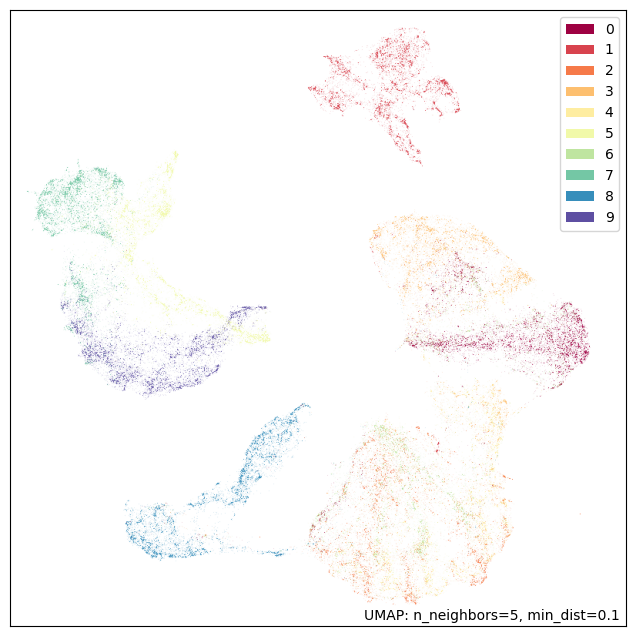

In [14]:
umap.plot.points(mapper, labels=fmnist.target)

### Quality Assessment

#### Shepard plot of embeddings

In [10]:
embedding

array([[-1.1799837 ,  3.05715   ],
       [15.7458    ,  3.0270684 ],
       [10.916527  ,  3.925521  ],
       ...,
       [ 6.4184356 ,  1.615191  ],
       [11.693639  , 12.771815  ],
       [-0.23317374,  8.383993  ]], dtype=float32)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import umap
from sklearn.datasets import fetch_openml

# Load the Fashion-MNIST dataset from OpenML
fmnist_data = fmnist.data.to_numpy()

# Subsampling the data
np.random.seed(42)
subsample_indices = np.random.choice(fmnist_data.shape[0], size=2000, replace=False)
subsample_data = fmnist_data[subsample_indices]
subsample_embedding = embedding[subsample_indices]

# Step 1: Compute pairwise distances in the original high-dimensional space
original_distances = pairwise_distances(subsample_data)

# Step 2: Compute pairwise distances in the UMAP embedding space
embedding_distances = pairwise_distances(subsample_embedding)

# Step 3: Flatten the distance matrices and plot
original_distances_flat = original_distances.flatten()
embedding_distances_flat = embedding_distances.flatten()

# Plotting the Shepard plot
plt.figure(figsize=(10, 8))
plt.scatter(original_distances_flat, embedding_distances_flat, alpha=0.5, s=1)
plt.xlabel("Original high-dimensional distances")
plt.ylabel("UMAP embedding distances")
plt.title("Shepard Plot")
plt.show()

: 

: 

: 